# Iris dataset - Regressão Logística - 3 classes

## Objetivos

Este notebook ilustra o problema de classificação.

O objetivo é classificar as amostras da Íris em 3 classes.
- o alvo é o índice da classe: 0, 1 ou 2
- função de perda é Entropia Cruzada
- rede é uma camada densa linear com duas entradas e três saídas (n. de classes)

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmax_CrossEntropy_Otimizacao.png)

## Importação das bibliotecas

In [4]:
%matplotlib inline
import os
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

from IPython import display
from sklearn.model_selection import train_test_split

## Dataset: Leitura, normalização e visualização dos dados

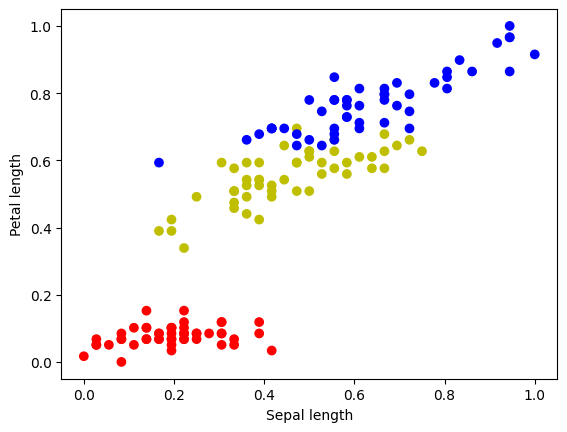

In [5]:
iris = load_iris()
X = iris.data[:,::2]  # comprimento das sépalas e pétalas, indices 0 e 2
# normalização
Xc = X - X.min(axis=0)
Xs = Xc.max(axis=0)
Xc = Xc/Xs

Y = iris.target
colors = np.array(['r','y','b'])
plt.scatter(Xc[:, 0], Xc[:, 1], c=colors[Y])
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.show()

# Dividindo Dataset em Treinamento E Validação

In [6]:
x_train, x_test, y_train, y_test = train_test_split(Xc, Y, test_size=0.2, random_state=42)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 2)
(30, 2)
(120,)
(30,)


### Prepara os dados para o PyTorch

In [8]:
X_train_tensor = torch.FloatTensor(x_train)  # Entrada é FloatTensor
Y_train_tensor = torch.LongTensor(y_train)    # Classe é LongTensor
X_test_tensor = torch.FloatTensor(x_test)  # Entrada é FloatTensor
Y_test_tensor = torch.LongTensor(y_test)    # Classe é LongTensor

In [9]:
Y_train_tensor

tensor([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0,
        2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1,
        0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0,
        0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
        2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [10]:
X_train_tensor

tensor([[0.0833, 0.0000],
        [0.3889, 0.0847],
        [0.6667, 0.5763],
        [0.1389, 0.1017],
        [0.0278, 0.0508],
        [0.5556, 0.6780],
        [0.5833, 0.5932],
        [0.2500, 0.0847],
        [0.1944, 0.0678],
        [0.2500, 0.0847],
        [0.4167, 0.6949],
        [0.4722, 0.5932],
        [0.6667, 0.6271],
        [0.3056, 0.0508],
        [0.3056, 0.0847],
        [0.3333, 0.4576],
        [0.5556, 0.6949],
        [0.5833, 0.7627],
        [0.6389, 0.5763],
        [0.8056, 0.8644],
        [0.3889, 0.5424],
        [0.9167, 0.9492],
        [0.3611, 0.5932],
        [0.2222, 0.0678],
        [0.9444, 0.9661],
        [0.4167, 0.5254],
        [0.2500, 0.0678],
        [0.1944, 0.0508],
        [0.2222, 0.1525],
        [0.1944, 0.4237],
        [0.5556, 0.6610],
        [0.1389, 0.1525],
        [0.1944, 0.1017],
        [0.2222, 0.1186],
        [0.3611, 0.5424],
        [0.2222, 0.0847],
        [0.3889, 0.5424],
        [0.9444, 0.9661],
        [0.0

## Construindo o modelo da rede

A saída da rede é composta por um neurônio para cada classe. A saída é denominada *scores* ou logitos:

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLogisticaRede_2_3.png)

In [11]:
model = nn.Linear(2,3)  # 2 entradas e 3 saídas

In [12]:
model.state_dict()

OrderedDict([('weight',
              tensor([[ 0.3734, -0.6824],
                      [ 0.3924,  0.1824],
                      [-0.5615,  0.3935]])),
             ('bias', tensor([-0.4764,  0.4823, -0.6759]))])

### Fazendo um predict

In [13]:
out = model(X_train_tensor[:4,:]) # 4 amostras
out

tensor([[-0.4453,  0.5150, -0.7227],
        [-0.3890,  0.6504, -0.8609],
        [-0.6207,  0.8490, -0.8234],
        [-0.4940,  0.5554, -0.7138]], grad_fn=<AddmmBackward0>)

In [14]:
oo = F.softmax(out,dim=1)
oo

tensor([[0.2288, 0.5978, 0.1734],
        [0.2246, 0.6352, 0.1401],
        [0.1622, 0.7053, 0.1325],
        [0.2147, 0.6130, 0.1723]], grad_fn=<SoftmaxBackward0>)

### Calculando as probabilidades com Softmax

- [Wikipedia:Softmax_function](https://en.wikipedia.org/wiki/Softmax_function)

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/softmax.png)

In [15]:
F.softmax(out,dim=1)*100

tensor([[22.8815, 59.7790, 17.3395],
        [22.4646, 63.5205, 14.0148],
        [16.2213, 70.5335, 13.2451],
        [21.4669, 61.3033, 17.2298]], grad_fn=<MulBackward0>)

### Predição da classe

In [16]:
prob,y_pred = torch.max(F.softmax(out,dim=1),dim=1)
print(y_pred)
print(prob)

tensor([1, 1, 1, 1])
tensor([0.5978, 0.6352, 0.7053, 0.6130], grad_fn=<MaxBackward0>)


## Treinamento

### Classe para visualização dinâmica

In [17]:
def predict(model, inputs):
    outputs = model(Variable(inputs))
    _, predicts = torch.max(outputs, 1)

    return predicts.data.numpy()

def predict_prob(model, inputs):
    outputs = model(Variable(inputs))
    outputs = F.softmax(outputs,dim=1)
    predicts, _ = torch.max(outputs, 1)

    return predicts.data.numpy()

class MyPlotter():
    def __init__(self, model, X, Y, n_epoch, filepath=None, h = .01):
        self.model = model
        self.X = X
        self.Y = Y
        self.n_epoch = n_epoch
        self.filepath = filepath
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        self.xx, self.yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        self.loss_hist = []
        self.val_loss_hist = []
        self.X_grid = np.c_[self.xx.ravel(), self.yy.ravel()]

        #Gráficos a serem mostrados pelo callback
        self.fig = plt.figure(figsize=(12, 4), dpi=100)
        self.ax1 = self.fig.add_subplot(1, 3, 1)
        self.ax1.set_xlim(0, nb_epoch)
        self.ax1.set_xlabel('Epoca')#,fontsize=28)
        self.ax1.set_ylabel('Perda')#,fontsize=28)
        self.ax1.set_title('Perda x Época')
        self.ax1.plot([],[],'b',linewidth = 2.0,label = "Treino")
        self.ax1.grid(True)

        self.ax2 = self.fig.add_subplot(1, 3, 2)
        self.ax2.set_xlim(Xc[:,0].min(), Xc[:,0].max())
        self.ax2.set_ylim(Xc[:,1].min(), Xc[:,1].max())
        self.ax2.set_xlabel('Comprimento da Sepala')#,fontsize=28)
        self.ax2.set_ylabel('Largura da Sepala')#,fontsize=28)
        self.ax2.set_title('Fronteiras de decisão')

        self.ax3 = self.fig.add_subplot(1, 3, 3)
        self.ax3.set_xlim(Xc[:,0].min(), Xc[:,0].max())
        self.ax3.set_ylim(Xc[:,1].min(), Xc[:,1].max())
        self.ax3.set_xlabel('Comprimento da Sepala')#,fontsize=28)
        self.ax3.set_ylabel('Largura da Sepala')#,fontsize=28)
        self.ax3.set_title('Máxima probabilidade')

    def on_train_begin(self, logs={}):
        display.display(self.fig)
        display.clear_output(wait=True)

    def on_epoch_end(self, epoch, logs={}):
        if 'loss' in logs.keys():
            self.loss_hist.append(logs['loss'])

            if epoch%250==0:
                self.ax1.plot(np.arange(epoch+1), self.loss_hist, 'b', linewidth = 2.0)

                #Z = predict(self.model, torch.from_numpy(self.X_grid).type(torch.FloatTensor))
                Zc = predict(self.model,torch.FloatTensor(self.X_grid))
                Zc = Zc.reshape(self.xx.shape)

                self.ax2.pcolormesh(self.xx, self.yy, Zc, cmap=plt.cm.Paired)
                colors = np.array(['r','y','b'])
                self.ax2.scatter(self.X[:, 0], self.X[:, 1], s=40, c=colors[self.Y], edgecolors='k', cmap=plt.cm.Paired)

                Zp = predict_prob(self.model,torch.FloatTensor(self.X_grid))
                Zp = Zp.reshape(self.xx.shape)

                self.ax3.pcolormesh(self.xx, self.yy, Zp, cmap=plt.cm.magma)
                colors = np.array(['r','y','b'])
                self.ax3.scatter(self.X[:, 0], self.X[:, 1], s=40, c=colors[self.Y], edgecolors='k', cmap=plt.cm.Paired)

                display.display(self.fig)
                display.clear_output(wait=True)

### Laço principal de treinamento da Regressão Logística por Softmax

In [18]:
lr = 0.15

optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

In [19]:
nb_epoch = 10000

losses = []
losses_test = []
acc_list = []
acc_test_list = []
for i in range(nb_epoch):
    # predict da rede
    output = model(X_train_tensor)
    output_test = model(X_test_tensor)

    # calcula a perda
    loss = criterion(output, Y_train_tensor)
    loss_test = criterion(output_test, Y_test_tensor)

    # Faz o backpropagation para calcular os gradientes e otimizar parâmetros
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data.item())
    losses_test.append(loss_test.data.item())

    _, class_max = torch.max(F.softmax(output,dim=1),dim=1)
    _, class_test_max = torch.max(F.softmax(output_test,dim=1),dim=1)
    acc_list.append((class_max == Y_train_tensor).float().mean())
    acc_test_list.append((class_test_max == Y_test_tensor).float().mean())

    final_loss = loss.data.item()

print('Final loss:', final_loss)

Final loss: 0.2041001319885254


In [20]:
print(acc_list)

[tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3417), tensor(0.3500), tensor(0.3667), tensor(0.3833), tensor(0.4750), tensor(0.5083), tensor(0.5833), tensor(0.6083), tensor(0.6500), tensor(0.6917), tensor(0.7917), tensor(0.8333), tensor(0.8500), tensor(0.8500), tensor(0.8333), tensor(0.7917), tensor(0.7667), tensor(0.7667), tensor(0.7667), tensor(0.7667), tensor(0.7417), tensor(0.7333), tensor(0.7250), tensor(0.7250), tensor(0.7167), tensor(0.7167), tensor(0.7167), tensor(0.7083), tensor(0.7083), tensor(0.7083), tensor(0.7083), tensor(0.7083), tensor(0.7083), tensor(0.7083), tensor(0.7083), tensor(0.7083), tensor(0.7083), tensor(0.7083), tensor(0.7083), tensor(0.7083), tensor(0.7083), tensor(0.7083), tensor(

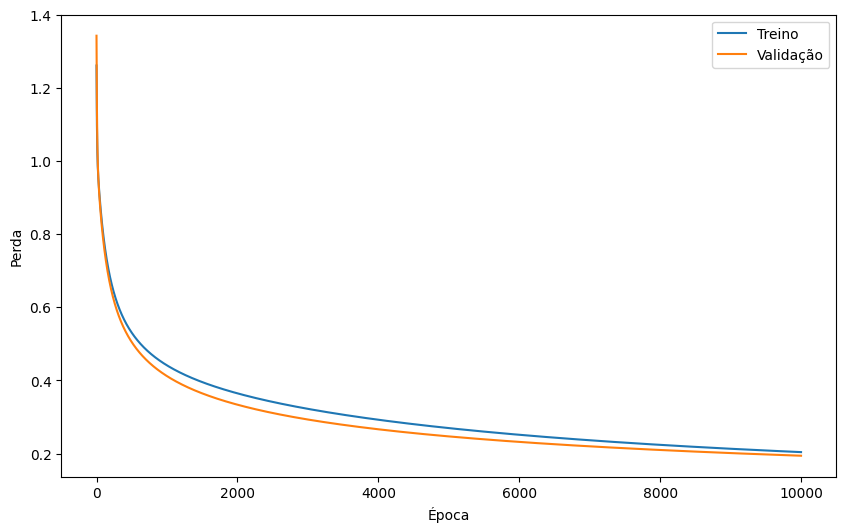

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(nb_epoch)), losses, label='Treino')
plt.plot(list(range(nb_epoch)), losses_test, label='Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()

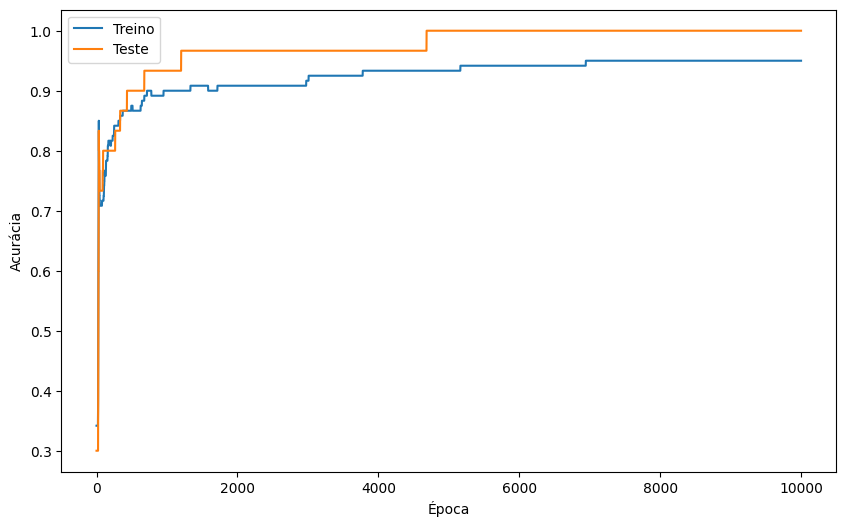

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(nb_epoch)), acc_list, label='Treino')
plt.plot(list(range(nb_epoch)), acc_test_list, label='Teste')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

## Avaliação

### Parâmetros após treinamento

In [23]:
model.state_dict()

OrderedDict([('weight',
              tensor([[ -2.4514, -15.1308],
                      [  2.1234,  -0.8835],
                      [  0.5324,  15.9077]])),
             ('bias', tensor([ 6.6890,  1.4052, -8.7642]))])

### Salvando os parâmetros treinados

In [24]:
os.makedirs('../models',exist_ok=True)
torch.save(model.state_dict(),'../models/RegrLog_Iris.pt')

In [25]:
! ls ../models/

'ls' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [26]:
nn.init.constant(model.weight,0)
model.state_dict()

C:\Users\NicolasMatheusRegoNe\AppData\Local\Temp\ipykernel_16276\952960416.py:1: FutureWarning: `nn.init.constant` is now deprecated in favor of `nn.init.constant_`.
  nn.init.constant(model.weight,0)


OrderedDict([('weight',
              tensor([[0., 0.],
                      [0., 0.],
                      [0., 0.]])),
             ('bias', tensor([ 6.6890,  1.4052, -8.7642]))])

### Recuperando os pesos salvos

In [27]:
param_saved = torch.load('../models/RegrLog_Iris.pt')
model.load_state_dict(param_saved)
model.state_dict()

OrderedDict([('weight',
              tensor([[ -2.4514, -15.1308],
                      [  2.1234,  -0.8835],
                      [  0.5324,  15.9077]])),
             ('bias', tensor([ 6.6890,  1.4052, -8.7642]))])

### Exatidão (acurácia) do classificador

Acurácia indica o número de acertos sobre o número total de amostras

In [31]:
X_tensor = torch.FloatTensor(Xc)
Y_pred = predict(model, X_tensor)

In [32]:
Y_pred = predict(model, X_tensor)
accuracy = (Y_pred == Y).mean()
print('Training Accuracy: ', accuracy)

Training Accuracy:  0.96


### Matriz de confusão

In [33]:
import pandas as pd
pd.crosstab(Y_pred, Y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,47,3
2,0,3,47


## Atividades

### Perguntas:

1. Observe que se após o treinamento, a célula for executada novamente, ela continua utilizando os parâmetros treinados até sua última execução. O que é preciso fazer para que o treinamento comece deste o início, como da primeira vez que foi executado?

Para que o treinamento comece do zero (resetando os pesos para valores aleatórios iniciais), é necessário reinicializar o modelo e o otimizador antes de entrar no laço for.
Caso apenas a célula do loop seja executada, o PyTorch continua ajustando os pesos (model.weight e model.bias) que estão na memória, partindo do ponto onde parou na execução anterior.


2. Experimente refazer o treinamento com diferentes valores de learning rate

### Exercícios:

1. Observando o gráfico de máxima probabilidade, responda:
    1. Qual é a amostra classificada corretamente, com maior probabilidade?
    É um ponto que está longe das fronteiras de decisão, bem no centro da região da sua cor correta (geralmente uma Setosa distante das outras).

    2. Qual é a amostra classificada erradamente, com maior probabilidade?
    É um ponto "infiltrado" profundamente na região da cor errada (um outlier que o modelo tem "certeza" que pertence à classe errada).

    3. Qual é a amostra classificada corretamente, com menor probabilidade?
    É um ponto que está muito próximo da fronteira de decisão, quase mudando de cor, mas ainda no lado certo.

    4. Qual é a amostra classificada erradamente, com menor probabilidade?
    É um ponto que está muito próximo da fronteira de decisão, mas que acabou caindo por pouco no lado errado.


2. Quantos parâmetros possui esta rede? Quantos são da camada densa e quantos são de bias?
    A camada nn.Linear(2, 3) possui 9 parâmetros treináveis: 6 pesos, organizados em uma matriz 3x2, e 3 vieses, um para cada saída da camada.

3. Quantas entradas e quantas saídas esta rede possui?
    O modelo recebe 2 entradas (comprimento e largura da sépala normalizados) e produz 3 saídas, que são os logitos associados às três classes de Íris — Setosa, Versicolor e Virginica antes da conversão pela Softmax.

4. Como se pode calcular a acurácia a partir da matriz de confusão?
    A acurácia pela matriz de confusão é obtida dividindo-se a soma dos valores da diagonal principal (acertos) pelo total de amostras da matriz.


5. O que faz a função `torch.max`? Quantos parâmetros ela retorna e quais seus significados?
    A função torch.max obtém o valor máximo ao longo de uma dimensão e retorna tanto esses valores quanto seus índices. Esses índices correspondem às classes preditas pelo modelo após a aplicação do Softmax.

    - http://pytorch.org/docs/master/torch.html?highlight=torch%20max#torch.max

## Principais aprendizados

Implementação de  um classificador multiclasse usando Regressão Logística no PyTorch, onde nn.Linear mapeia as entradas para os logits das três classes da Íris. O CrossEntropyLoss, que combina Softmax e NLLLoss, simplificando o treinamento. A prática incluiu o uso de torch.max para obter a classe predita, a avaliação via matriz de confusão e acurácia, e a importância de reinicializar o modelo e o otimizador para garantir comparações justas entre diferentes hiperparâmetros, como a taxa de aprendizado.